# 1. Import libraries

In [3]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



# 2. Loading our dataset "uber.csv" using pandas 

In [4]:
# 2. Load the dataset
df = pd.read_csv('uber.csv')


# 3. Inspect the dataset

In [5]:
# 3. Inspect the dataset
print(df.rename(columns={'Unnamed: 0': 'Ride_ID'}, inplace=True))

print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescriptive Statistics:")
print(df.describe())




None
First 5 rows:
    Ride_ID                            key  fare_amount  \
0  24238194    2015-05-07 19:52:06.0000003          7.5   
1  27835199    2009-07-17 20:04:56.0000002          7.7   
2  44984355   2009-08-24 21:45:00.00000061         12.9   
3  25894730    2009-06-26 08:22:21.0000001          5.3   
4  17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3  

### `print(df.rename(columns={'Unnamed: 0': 'Ride_ID'}, inplace=True)`

**purpose:**
change the unnamed column to "rider_ID" to improve clarity.

### `print(df.head())`

**Purpose:**  
Displays the first 5 rows of the dataset.

**Why?**  
- To get a quick look at the data structure.  
- Helps you verify column names, data types, and see sample values.  
- Useful for spotting early issues like weird values, missing data, or wrong column formats.  

### `print(df.info())`

**Purpose:**  
Prints a summary of the dataset.

**Output Includes:**  
- Total number of rows and columns  
- Column names  
- Data types (int, float, object, datetime, etc.)  
- Number of non-null (valid) entries in each column  

### `print(df.isnull().sum())`

**Purpose:**  
Counts the number of missing (NaN) values in each column.

**Why?**  
- To identify which columns have missing data and how much is missing.  
- Helps decide whether to drop or fill missing values during data cleaning.  

### `print(df.describe())`

**Purpose:**  
Provides summary statistics for all numeric columns in the dataset.

**Output Includes:**  
- **Count:** Number of non-missing values  
- **Mean:** Average  
- **Standard Deviation (std):** Spread of the data  
- **Min, 25%, 50% (Median), 75%, Max:** Percentiles  

**Why?**  
- To understand data ranges, central tendencies, and variability.  
- To identify potential outliers or data quality issues (e.g., negative fares). 

# 4.Data cleaning

In [6]:
# 4.1 Handle missing values

# 4.1.1 Drop rows with missing fare or distance (critical columns)
df_clean = df.dropna(subset=['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

# 4.1.2 Remove duplicates
df_clean = df_clean.drop_duplicates()

# 4.1.3 Convert 'pickup_datetime' to datetime format if exists
if 'pickup_datetime' in df_clean.columns:
    df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'], errors='coerce')

# 4.1.4 Drop rows with invalid datetime conversion
df_clean = df_clean.dropna(subset=['pickup_datetime'])

# 4.2 Save cleaned data
df_clean.to_csv('uber_cleaned.csv', index=False)

print("\nCleaned data saved to 'data/uber_cleaned.csv'")



Cleaned data saved to 'data/uber_cleaned.csv'


## 4.1 Handle Missing Values

#### 4.1.1 Drop rows with missing fare or distance (critical columns)

***purpose***
Checks for missing values in critical columns:
- **`fare_amount`**
- **`pickup_longitude`**
- **`pickup_latitude`**
- **`dropoff_longitude`**
- **`dropoff_latitude`**

Drops any row where at least one of these columns is NaN (missing).

**Why?**

- Fare and coordinates are essential for analysis.
- Missing these values means the ride data is incomplete and unusable.

#### 4.1.2 Remove duplicates
**What it does:**
- Removes duplicate rows in the dataset to avoid double counting rides.

#### 4.1.3 Convert 'pickup_datetime' to datetime format if exists
**What it does:**
Converts the `pickup_datetime` column from string to datetime format.

### `errors=coerce` means:
If a date cannot be converted (e.g., wrong format), it will be set to `NaT` (Not a Time).

#### 4.1.4 Drop rows with invalid datetime conversion
**What it does:**
Removes rows where pickup_datetime is invalid (those that became NaT during conversion).

**Why?**

- Dates are critical for time-based analysis (hours, days, trends).

- Invalid dates would cause errors in time-related calculations.

## 4.2 Save cleaned data
**What it does:**

- Saves the cleaned dataset to a new CSV file called uber_cleaned.csv in the data/ folder.

- index=False prevents pandas from saving the row numbers as a separate column.




# 5.Exploratory Data Analysis (EDA)
### 5.1 UNIVATIATE ANALYSIS

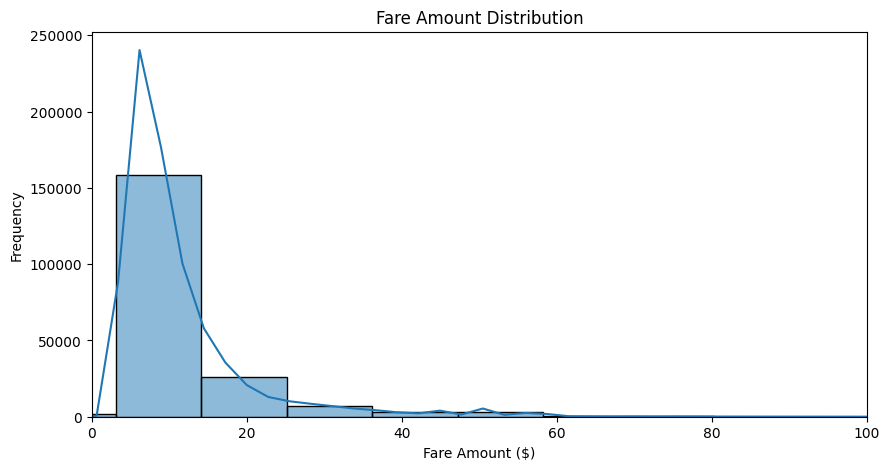

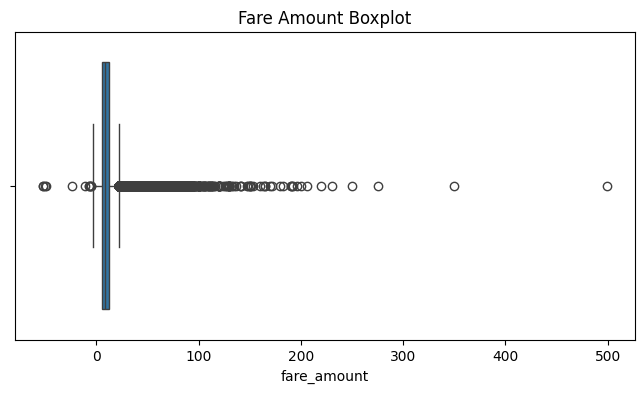

In [7]:
# Histogram of fares
plt.figure(figsize=(10,5))
sns.histplot(df_clean['fare_amount'], bins=50, kde=True)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.xlim(0,100)  # Limit x-axis for better visibility
plt.show()

# Boxplot for fare (to detect outliers)
plt.figure(figsize=(8,4))
sns.boxplot(x=df_clean['fare_amount'])
plt.title('Fare Amount Boxplot')
plt.show()


### 5.2 Bivariate Analysis

### Calculating distance using haversine formula

In [ ]:


def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points 
    on the Earth (specified in decimal degrees).
    Returns distance in miles.
    """
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in miles
    r = 3956  
    return c * r


## Creating and adding distance column to the dataset

In [9]:
# Create a new 'distance' column
df_clean['distance'] = haversine_distance(
    df_clean['pickup_latitude'], df_clean['pickup_longitude'],
    df_clean['dropoff_latitude'], df_clean['dropoff_longitude']
)


In [10]:
df_clean.to_csv('uber_cleaned_with_feature.csv', index=False)

print("\nEnhanced dataset saved to 'data/uber_cleaned_with_feature.csv'")
print("\nFinal columns in dataset:", df_clean.columns.tolist())


Enhanced dataset saved to 'data/uber_cleaned_with_feature.csv'

Final columns in dataset: ['Ride_ID', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance']


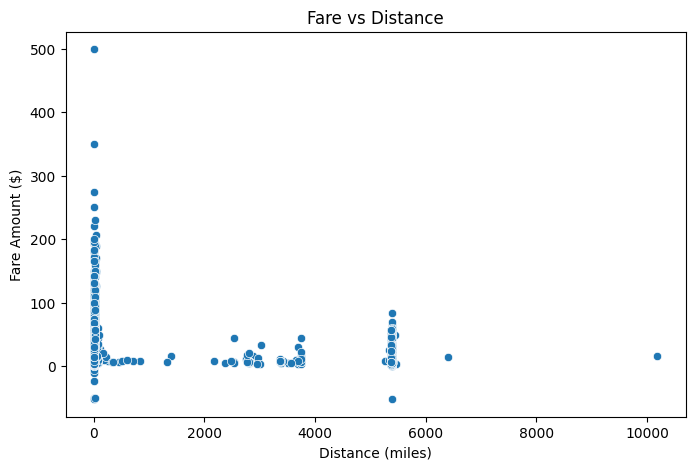

In [11]:
# Scatter plot: Fare vs Distance (if distance exists or calculate using coordinates)
if 'distance' in df_clean.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='distance', y='fare_amount', data=df_clean)
    plt.title('Fare vs Distance')
    plt.xlabel('Distance (miles)')
    plt.ylabel('Fare Amount ($)')
    plt.show()

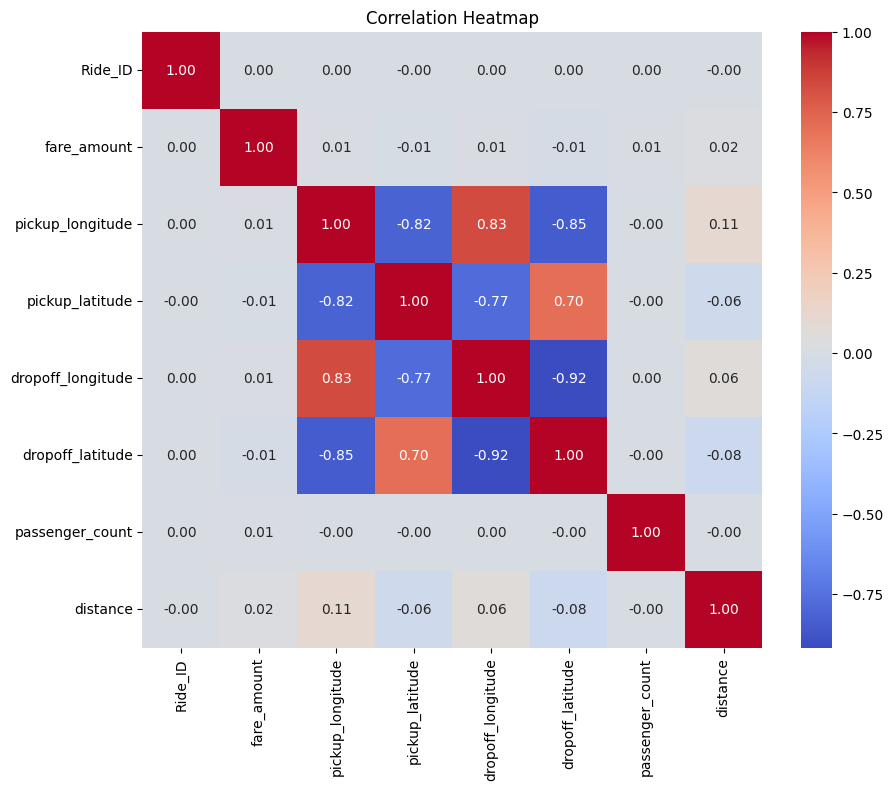

In [ ]:
# Correlation heatmap (numeric columns only) before new features
numeric_cols = df_clean.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 4. feature engineering

In [21]:
# Extract date/time features
df_clean['hour'] = df_clean['pickup_datetime'].dt.hour
df_clean['day'] = df_clean['pickup_datetime'].dt.day
df_clean['month'] = df_clean['pickup_datetime'].dt.month
df_clean['day_of_week'] = df_clean['pickup_datetime'].dt.dayofweek

# Peak/off-peak indicator (Example: 7-9am & 5-7pm as peak hours)
def peak_hour(hour):
    return 1 if hour in [7,8,9,17,18,19] else 0

df_clean['peak_hour'] = df_clean['hour'].apply(peak_hour)

import os

#Ensure 'data' directory exists
os.makedirs('data', exist_ok=True)

# Save enhanced dataset for Power BI
df_clean.to_csv('data/uber_cleaned_new_features.csv', index=False)
print("Enhanced dataset saved to 'data/uber_cleaned_new_features.csv'")

# Check if 'rider_id' column exists
if 'Ride_ID' in df_clean.columns:
    # Display selected columns
    display_columns = ['Ride_ID', 'hour', 'day', 'month', 'day_of_week', 'peak_hour']
    print(df_clean[display_columns].head(10))  # Display first 10 rows
else:
    print("Column 'ride_ID' not found in the dataset.")


Enhanced dataset saved to 'data/uber_cleaned_new_features.csv'
    Ride_ID  hour  day  month  day_of_week  peak_hour
0  24238194    19    7      5            3          1
1  27835199    20   17      7            4          0
2  44984355    21   24      8            0          0
3  25894730     8   26      6            4          1
4  17610152    17   28      8            3          1
5  44470845     2   12      2            5          0
6  48725865     7   12     10            6          1
7  44195482    13   11     12            1          0
8  15822268     9   17      2            4          1
9  50611056    19   29      3            3          1


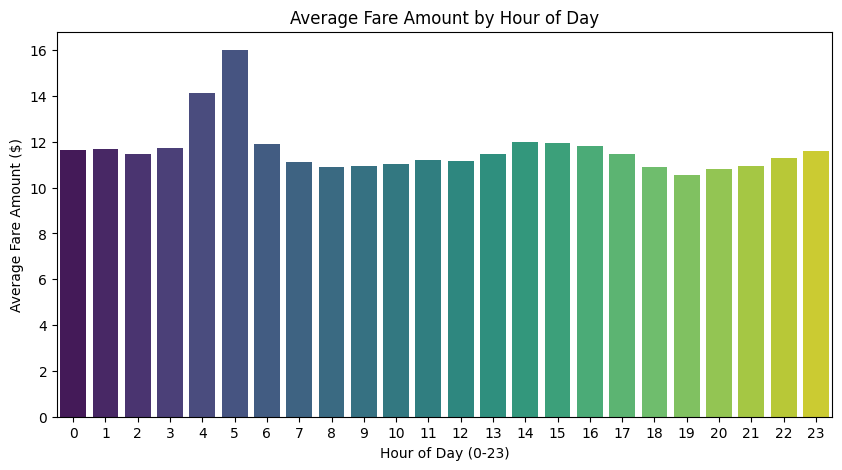

In [22]:
# Group data by hour and calculate average fare
hourly_fare = df_clean.groupby('hour')['fare_amount'].mean().reset_index()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='hour', y='fare_amount', data=hourly_fare, palette='viridis')
plt.title('Average Fare Amount by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(range(0,24))
plt.show()

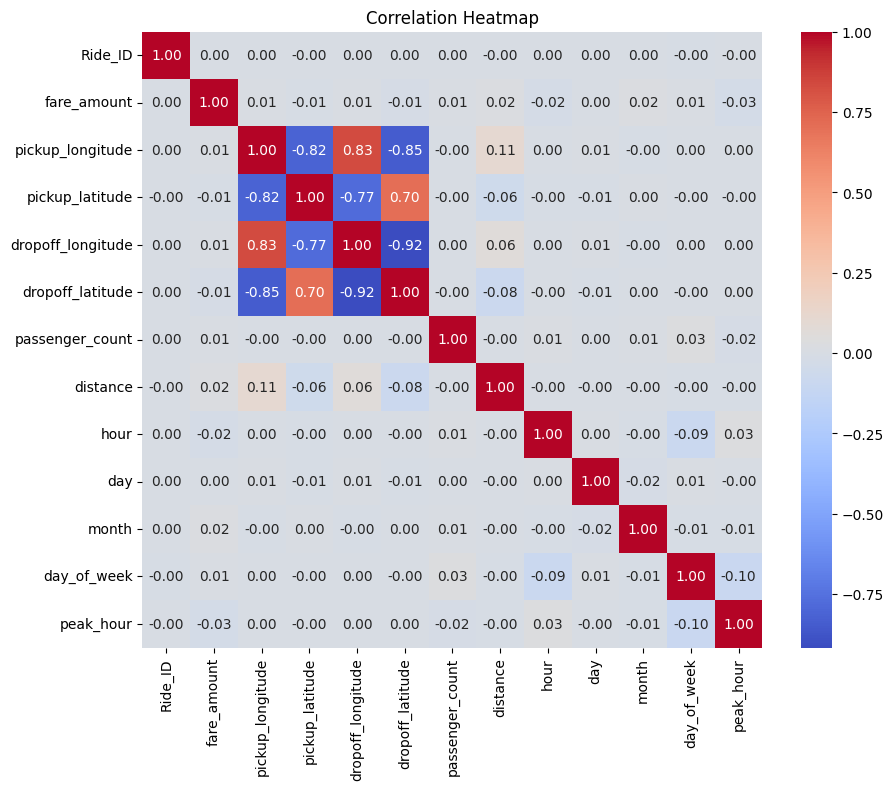

In [ ]:
# Correlation heatmap (numeric columns only) after new features
numeric_cols = df_clean.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()